In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


def fetch_data_from_api(url, data, headers):

    response = requests.post(url, json=data, headers=headers)
    return response.json()['d']

def extract_info(description):
    soup = BeautifulSoup(description, 'html.parser')
    details = {
        'Crime': soup.find(text='Crime:').next_element.strip() if soup.find(text='Crime:') else None,
        'Crime Type': soup.find(text='Crime Type:').next_element.strip() if soup.find(text='Crime Type:') else None,
        'Crime Classification': soup.find(text='Crime Classification:').next_element.strip() if soup.find(text='Crime Classification:') else None,
        'Address': soup.find(text='Address:').next_element.strip() if soup.find(text='Address:') else None,
        'City': soup.find(text='City:').next_element.strip() if soup.find(text='City:') else None,
        'Occurred': soup.find(text='Occurred:').next_element.strip() if soup.find(text='Occurred:') else None,
        'Case Number': soup.find(text='Case #:').next_element.strip() if soup.find(text='Case #:') else None,
        'Incident Number': soup.find(text='Incident #:').next_element.strip() if soup.find(text='Incident #:') else None
    }
    return details


url = 'https://ucsc.crimegraphics.com/2013/MapData.asmx/GetMapPoints'

headers = {
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'content-type': 'application/json; charset=UTF-8',
    'origin': 'https://ucsc.crimegraphics.com',
    'referer': 'https://ucsc.crimegraphics.com/2013/default.aspx',
}

# JSON payload
data = {
    'AGCODE': 'UCSC',
    'StartDate': '12/01/2022',
    'EndDate': '12/30/2023',
    'MapType': 'C',
    'GroupTypes': 'ARSON,ASSAULT,ATTBURG,ATTRAPE,BURGLARY,HOMICIDE,LARCENY,MANSLAU,RAPE,ROBBERY,STOLVEH',
    'CirLat': 0,
    'CirLon': 0,
    'CirRad': 0
}


api_data = fetch_data_from_api(url, data, headers)

df = pd.DataFrame(api_data)

description_extracted = df['Description'].apply(extract_info)

d_extracted = pd.DataFrame(list(description_extracted))

df_final = pd.concat([df, d_extracted], axis=1).drop(columns=['Description','Icon','Shadow'])


#print(df_final.head)
#print(df_final.columns)

<ipython-input-9-6c2052afbcfb>:15: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

<ipython-input-9-6c2052afbcfb>:16: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

<ipython-input-9-6c2052afbcfb>:17: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

<ipython-input-9-6c2052afbcfb>:18: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

<ipython-input-9-6c2052afbcfb>:19: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

<ipython-input-9-6c2052afbcfb>:20: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

<ipython-input-9-6c2052afbcfb>:21: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

<ipython-input-9-6c2052afbcfb>:22: Deprec

<Axes: xlabel='count', ylabel='Crime Type'>

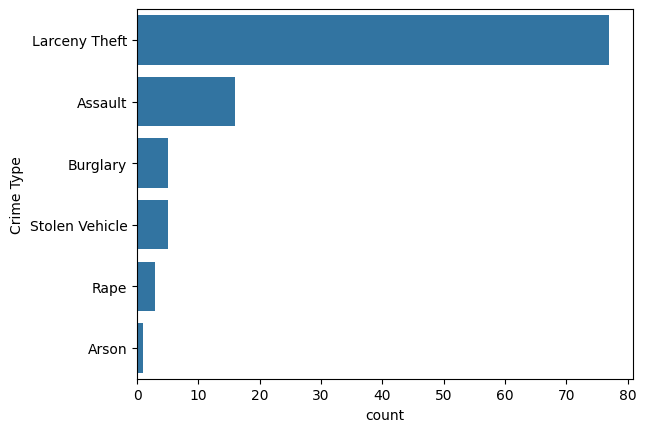

In [10]:
import seaborn as sns

sns.countplot(y='Crime Type', data=df_final, order=df_final['Crime Type'].value_counts().index)


In [11]:
import plotly.express as px

# Assuming df is your DataFrame and it contains 'Latitude', 'Longitude', and 'Title' columns
fig = px.scatter_mapbox(df_final,
                     lat=df_final['Latitude'],
                     lon=df_final['Longitude'],
                     color = df_final['Crime Type'],  # Displays title on hover
                     width = 1200,
                     height = 900,
                     title = 'Santa Cruz Crime Map'
                     )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})
# Show the interactive map
fig.show()


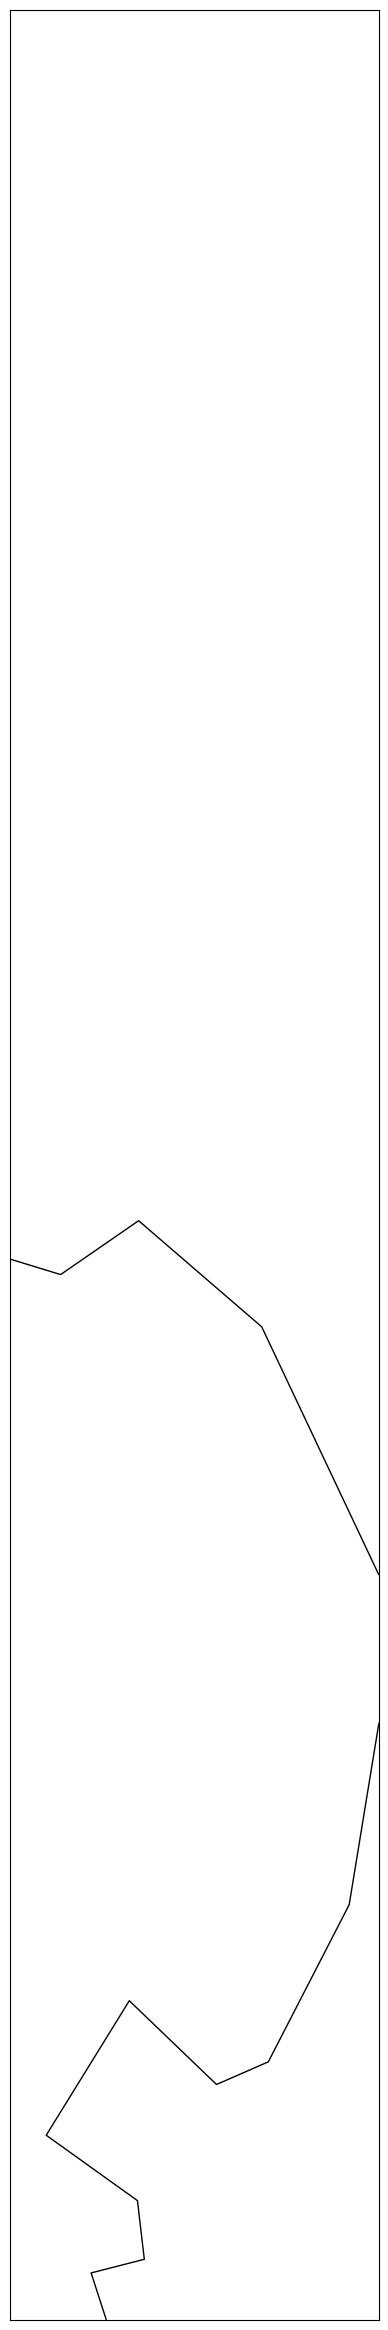

In [12]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Sample latitude and longitude points

lats = [36.974117]
lons = [-122.030796]
locations = ['Los Angeles']

# Create a Basemap instance
fig, ax = plt.subplots(figsize=(30, 30))
m = Basemap(projection='merc', llcrnrlat=36.5, urcrnrlat=37.5, llcrnrlon=-122.0, urcrnrlon=-121.8, resolution='i')

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Convert latitude and longitude to x and y coordinates
x, y = m(lons, lats)

# Plot the points on the map
m.scatter(x, y, marker='D',color='red')

# Annotate the points with the location names
for i, location in enumerate(locations):
    plt.annotate(location, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Show the map
plt.show()
